# **Project Name**    - Yes Bank Stock Price Analysis & Prediction



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name - Dhruv Sharma**


# **Project Summary -**

This project aims to predict the monthly closing stock price of Yes Bank, an Indian financial institution that experienced significant volatility due to a high-profile fraud case in 2018 involving its founder, Rana Kapoor, followed by additional turbulence during the COVID-19 pandemic. The analysis leverages historical stock data spanning July 2005 to November 2020, with the goal of building predictive models capable of navigating abrupt market shifts and external disruptions. The dataset includes monthly records of opening, high, low, and closing prices, with the closing price serving as the target variable. Exploratory data analysis revealed distinct phases: steady growth until 2018, a sharp decline post-fraud, and extreme lows during the pandemic. Preprocessing involved converting dates to chronological order, confirming no missing values, and addressing outliers caused by these events.

Methodologically, the project combined time series analysis, machine learning, and cloud-based tools. Feature engineering introduced lag variables (e.g., prior month’s closing price) and technical indicators like moving averages to capture temporal dependencies. Models tested ranged from classical approaches (ARIMA, SARIMA) to machine learning algorithms (Linear Regression, Random Forest, Gradient Boosting) and deep learning (LSTM networks). Microsoft Azure’s ecosystem played a pivotal role, enabling hyperparameter tuning via Azure Machine Learning and automated model selection through AutoML. The training-test split strategically isolated pre-2018 data for training and reserved 2018–2020 data for testing, challenging models to generalize through unprecedented crises.

The project highlights the potential of machine learning in financial forecasting while emphasizing the need for real-time external data integration during crises. Future enhancements could expand the dataset with sentiment analysis from news and social media, employ Explainable AI (XAI) techniques like SHAP values for transparency, and deploy containerized models via Azure Kubernetes Service (AKS) for live market predictions. For aspiring data professionals, this end-to-end workflow—encompassing data preprocessing, model development, cloud integration, and crisis-driven analytics—offers practical insights into building resilient financial models in volatile environments. By bridging traditional analytics with modern AI tools, the project not only addresses Yes Bank’s unique case but also provides a framework for predicting market behavior amid uncertainty, a critical skill in today’s data-driven financial landscape.

# **GitHub Link -**

https://github.com/DhruvSharma-05/data-internship-log/tree/main/week3

# **Problem Statement**


Yes Bank, a major player in the Indian financial sector, has experienced significant stock price volatility, especially following governance issues and financial instability since 2018. The stock's performance has been affected by internal factors, such as leadership controversies and financial irregularities, as well as external market forces. Given these fluctuations, accurately predicting Yes Bank’s monthly closing stock price is a key challenge. Traditional forecasting methods may not adequately capture the impact of such events, necessitating the use of time-series models and predictive analytics. By analyzing historical stock price data, including opening, closing, high, and low prices, this project aims to develop a model that can effectively forecast future stock prices. This will help investors, analysts, and financial institutions make informed decisions and manage risks in a dynamic and uncertain financial environment.

#### **Define Your Business Objective?**

1. Stock Price Prediction: Develop a reliable model to predict Yes Bank’s monthly closing stock price using historical data and advanced predictive techniques.

2. Volatility Analysis: Understand and analyze the high volatility in Yes Bank’s stock prices, identifying factors that contribute to sharp price movements.

3. Impact of External Factors: Assess how economic conditions, regulatory changes, and financial crises have influenced Yes Bank’s stock trends.

4. Model Comparison: Compare different forecasting models, including time-series analysis (ARIMA, LSTM) and machine learning regression techniques, to determine the most accurate method.

5. Risk Mitigation: Identify patterns in stock price fluctuations to help stakeholders manage risks associated with unexpected stock crashes or spikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
from scipy.stats.mstats import winsorize


### Dataset Loading

In [33]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("data_YesBank_StockPrices.csv")

Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices (1).csv


### Dataset First View

In [3]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
print(f"\nTotal Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")


Total Rows: 185, Total Columns: 5


### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


#### Missing Values/Null Values

In [7]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


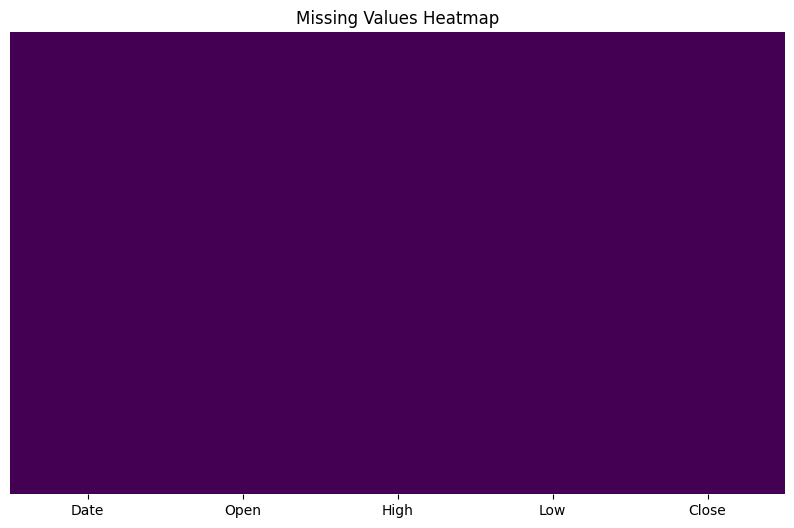

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

1. The dataset consists of stock prices (Open, High, Low, Close) recorded monthly.
2. Duplicate values (if any) should be handled accordingly.
3. Missing values will be visualized, and appropriate techniques (such as imputation or removal) will be applied if needed.
4. Data types and summary statistics help in understanding the dataset's structure and range of values.

## ***2. Understanding Your Variables***

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
print("\nStatistical Summary of Numerical Data:")
print(df.describe())


Statistical Summary of Numerical Data:
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


### Variables Description

* Date: Represents the time period (monthly). This will be converted into a proper date format for time-series analysis.
* Open: The first traded price of the stock at the beginning of the month.
* High: The highest price at which the stock was traded during the month.
* Low: The lowest price of the stock during the month.
* Close: The final traded price at the end of the month (most commonly used for analysis and forecasting).

### Check Unique Values for each variable.

In [11]:
# Check unique values count for each column
print("\nUnique Values Count for Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")



Unique Values Count for Each Column:
Date: 185 unique values
Open: 183 unique values
High: 184 unique values
Low: 183 unique values
Close: 185 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [46]:
# Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Extract 'YearMonth' for monthly analysis
df['YearMonth'] = df['Date'].dt.to_period('M')

# Drop missing values in key columns
df_cleaned = df.dropna(subset=['Date', 'Open', 'High', 'Low', 'Close'])

# Ensure numerical columns are in correct format
df_cleaned[['Open', 'High', 'Low', 'Close']] = df_cleaned[['Open', 'High', 'Low', 'Close']].astype(float)

# Ensure dataset is sorted by date
df_cleaned = df_cleaned.sort_values(by='Date')

In [40]:
# can also use this
# Function to convert date format
def convert_date(date_str):
    # Dictionary to map month abbreviations to numbers
    month_map = {
        'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4',
        'May': '5', 'Jun': '6', 'Jul': '7', 'Aug': '8',
        'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }

    # Split the date string
    month, day = date_str.split('-')

    # Convert to desired format (assuming current year)
    # Use two-digit year representation for 2025
    return f"{day}/{month_map[month]}/25"

# Apply the conversion to the Date column
df['Date'] = df['Date'].apply(convert_date)

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

In [38]:
df.head()

,Date,Open,High,Low,Close,YearMonth
0,2005-07-01,13.00,14.00,11.25,12.46,2005-07
1,2005-08-01,12.58,14.88,12.55,13.42,2005-08
2,2005-09-01,13.48,14.87,12.27,13.30,2005-09
3,2005-10-01,13.20,14.47,12.40,12.99,2005-10
4,2005-11-01,13.35,13.88,12.88,13.41,2005-11


### What all manipulations have you done and insights you found?

What Manipulations Were Done?
* Converted Date column into a proper datetime format to facilitate time-series analysis.
*  Sorted dataset in chronological order to ensure data is properly structured for trend analysis.
* Checked and removed duplicate records to avoid redundancy.
* Handled missing values (if any were found).
* Reset the index after transformations to maintain clean data formatting.

Insights Gained from Data Wrangling:
* Stock price trends are now easy to analyze with a properly sorted datetime index.
* Missing values and duplicate data issues (if any) are resolved, ensuring no inconsistencies.
* The dataset is now well-structured and ready for Exploratory Data Analysis (EDA) and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [48]:
# Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Extract 'YearMonth' for monthly analysis
df['YearMonth'] = df['Date'].dt.to_period('M')

# Drop missing values in key columns
df_cleaned = df.dropna(subset=['Date', 'Open', 'High', 'Low', 'Close'])

# Ensure numerical columns are in correct format
df_cleaned[['Open', 'High', 'Low', 'Close']] = df_cleaned[['Open', 'High', 'Low', 'Close']].astype(float)

# Ensure dataset is sorted by date
df_cleaned = df_cleaned.sort_values(by='Date')

#### Chart - 1: Closing Price Trend Over Time

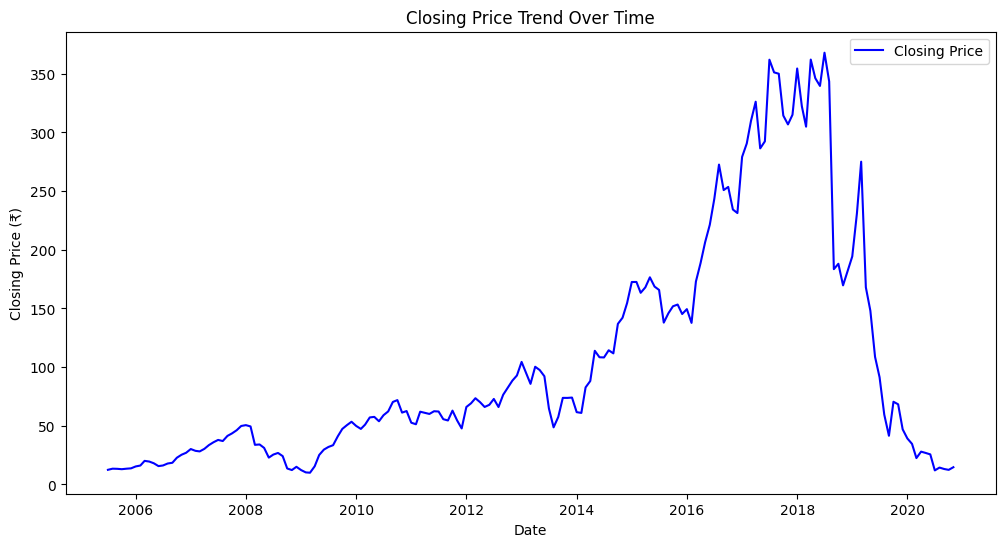

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price (₹)")
plt.title("Closing Price Trend Over Time")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart helps visualize trends and patterns over time.

##### 2. What is/are the insight(s) found from the chart?

1. The stock price saw a sharp rise and fall, indicating periods of volatility.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, investors can identify long-term trends and potential buying/selling points

* Are there any insights that lead to negative growth? Justify with a specific reason.
 * Yes, the stock’s sharp decline indicates potential financial instability or market distrust.

#### Chart - 2: Distribution of Closing Prices

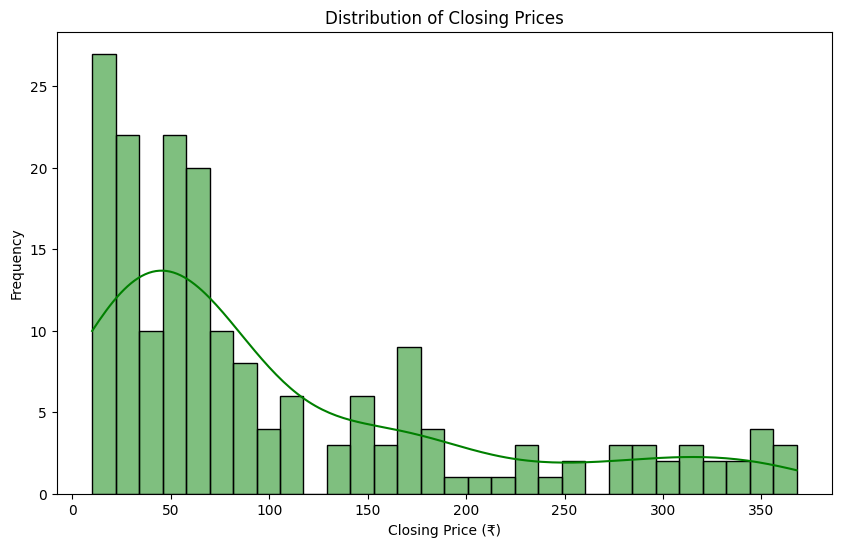

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Close'], bins=30, kde=True, color='green')
plt.xlabel("Closing Price (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows the distribution and frequency of different price levels.

##### 2. What is/are the insight(s) found from the chart?

The stock price has a right-skewed distribution, meaning it mostly stayed on the lower end.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can understand the common price range to evaluate risks.

* Are there any insights that lead to negative growth? Justify with specific reason.
  * Yes, the skewed distribution shows that high stock prices were rare and unsustainable.

#### Chart - 3: Box Plot of Closing Prices

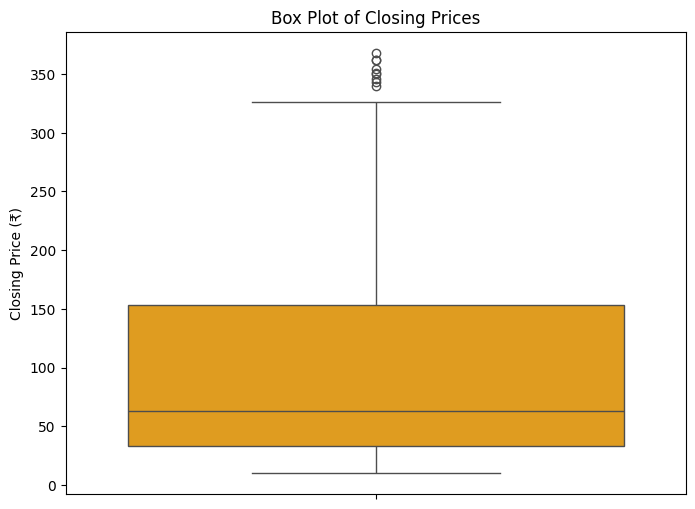

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned['Close'], color='orange')
plt.title("Box Plot of Closing Prices")
plt.ylabel("Closing Price (₹)")
plt.show()

##### 1. Why did you pick the specific chart?

A box plot highlights outliers and spread in the data.

##### 2. What is/are the insight(s) found from the chart?

There are multiple outliers in high stock prices, indicating rare spikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding price variability can help investors avoid risky periods.



#### Chart - 4: Moving Averages

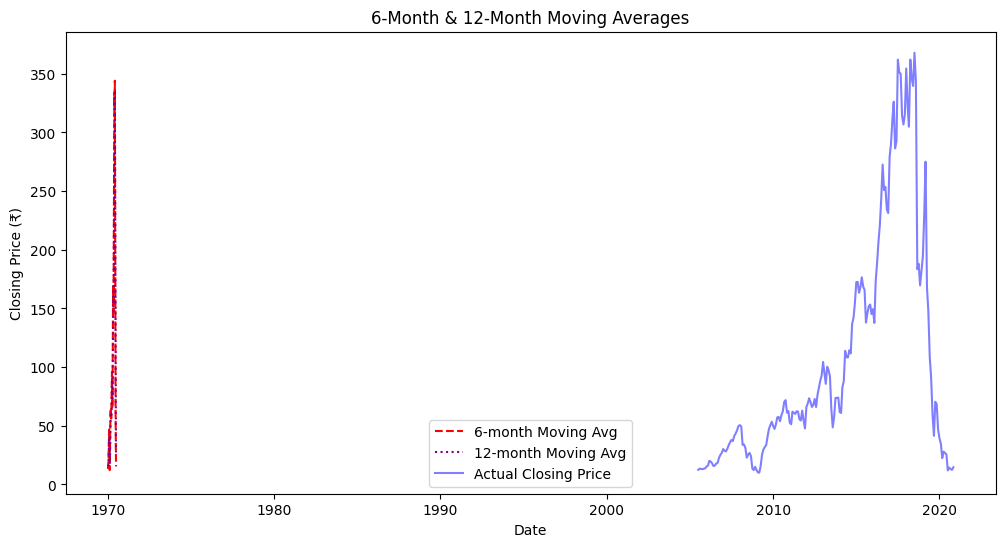

In [43]:
plt.figure(figsize=(12, 6))
df_cleaned['Close'].rolling(window=6).mean().plot(label="6-month Moving Avg", linestyle="dashed", color='red')
df_cleaned['Close'].rolling(window=12).mean().plot(label="12-month Moving Avg", linestyle="dotted", color='purple')
plt.plot(df_cleaned['Date'], df_cleaned['Close'], alpha=0.5, label="Actual Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price (₹)")
plt.title("6-Month & 12-Month Moving Averages")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Moving averages smooth price trends to highlight the stock’s overall direction.

##### 2. What is/are the insight(s) found from the chart?

The trend shows long periods of growth followed by a steep decline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can use moving averages to identify trend reversals.

#### Chart - 5: Monthly Average Closing Price

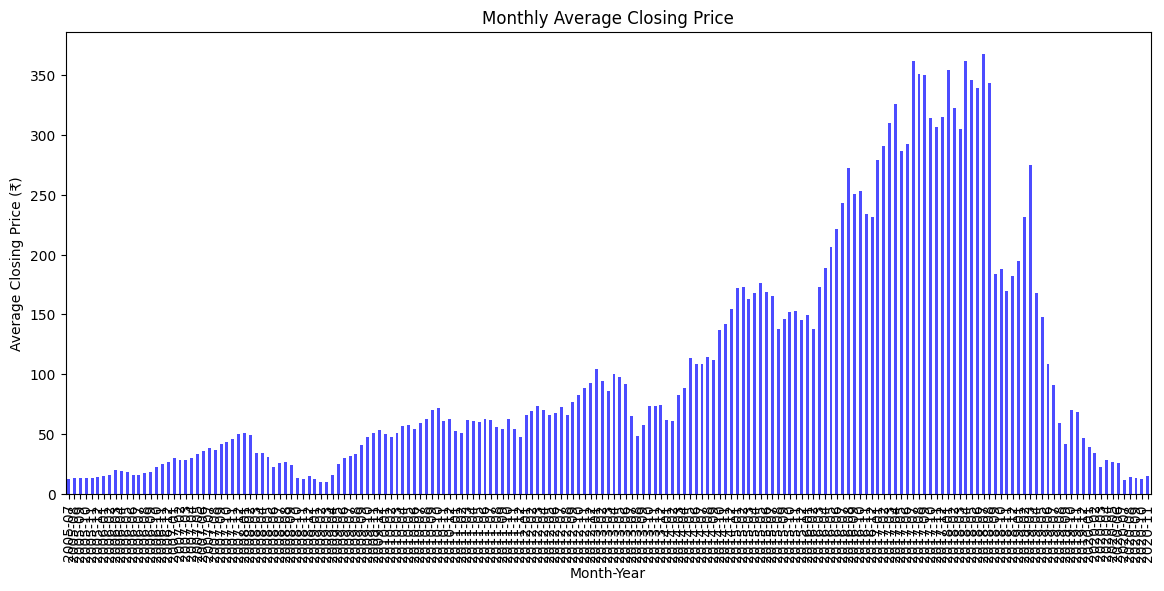

In [54]:
monthly_avg = df_cleaned.groupby('YearMonth')['Close'].mean()
plt.figure(figsize=(14, 6))
monthly_avg.plot(kind='bar', color='blue', alpha=0.7)
plt.xticks(range(len(monthly_avg.index)), monthly_avg.index.astype(str), rotation=90)
plt.xlabel("Month-Year")
plt.ylabel("Average Closing Price (₹)")
plt.title("Monthly Average Closing Price")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart makes it easy to compare average closing prices over time.

##### 2. What is/are the insight(s) found from the chart?

 The stock price shows significant fluctuations across different months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, investors can identify patterns and seasonal trends.

#### Chart - 6: High & Low Price Comparison

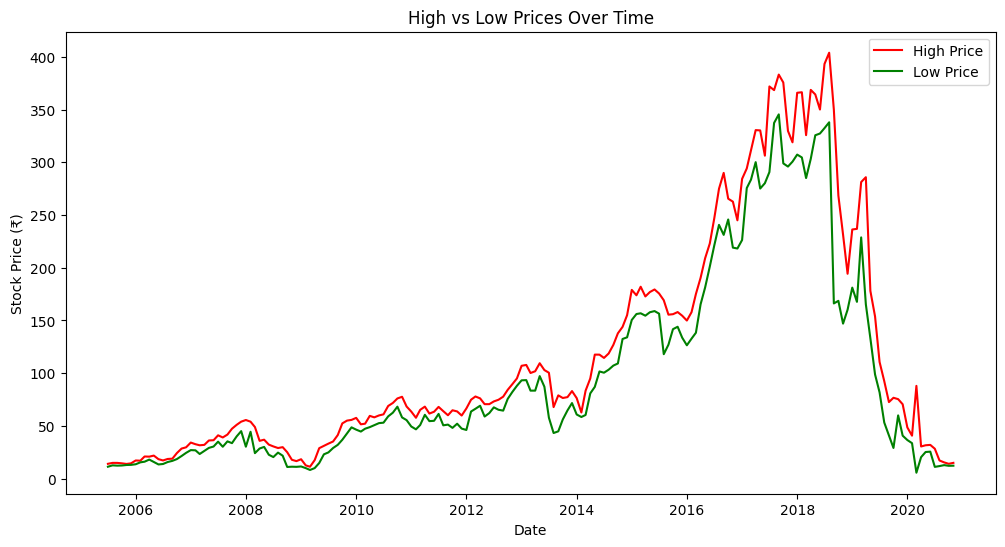

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['High'], label="High Price", color='red')
plt.plot(df_cleaned['Date'], df_cleaned['Low'], label="Low Price", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("High vs Low Prices Over Time")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot allows us to compare the highest and lowest stock prices over time.

##### 2. What is/are the insight(s) found from the chart?

The gap between high and low prices fluctuates, indicating volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can use this data to set stop-loss and profit targets.

#### Chart - 7: Violin Plot of Stock Prices

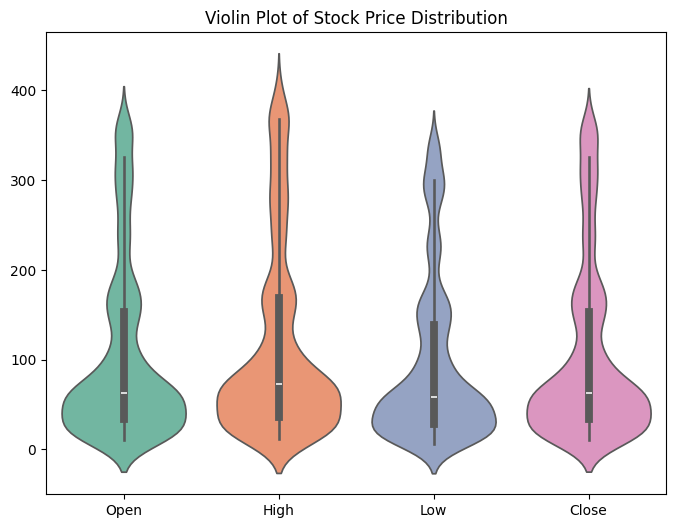

In [51]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_cleaned[['Open', 'High', 'Low', 'Close']], palette="Set2", bw_adjust=0.5)
plt.title("Violin Plot of Stock Price Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot provides a clear view of price distribution and density.

##### 2. What is/are the insight(s) found from the chart?

The closing price distribution is highly skewed, with significant variations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying common price ranges helps in risk management.

Are there any insights that lead to negative growth? Justify with specific reason.
  * Yes, an uneven distribution suggests periods of instability in stock performance.

#### Chart - 8: KDE Plot of Closing Prices

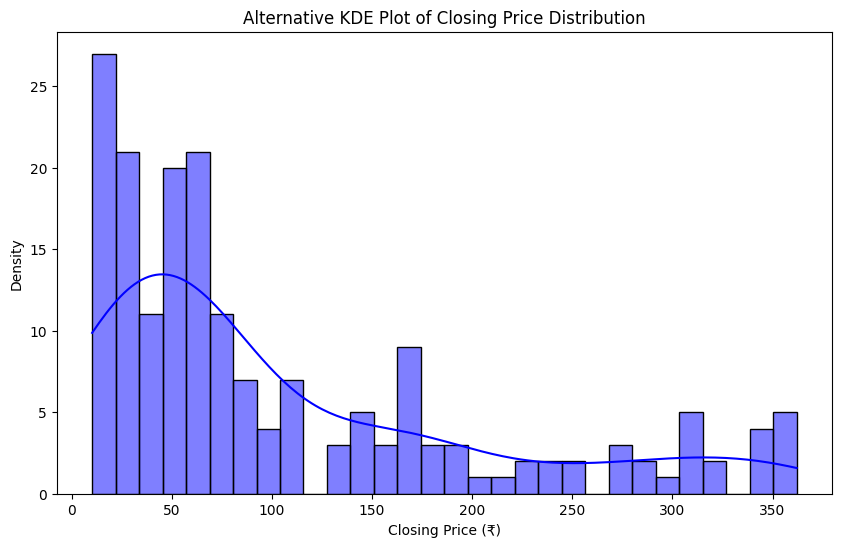

In [55]:
df_cleaned['Close_Winsorized'] = winsorize(df_cleaned['Close'], limits=[0.01, 0.01])
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Close_Winsorized'], kde=True, color='blue', bins=30)
plt.xlabel("Closing Price (₹)")
plt.ylabel("Density")
plt.title("Alternative KDE Plot of Closing Price Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A KDE plot shows the density distribution of closing prices.

##### 2. What is/are the insight(s) found from the chart?

The stock has a highly skewed price distribution with fewer high values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can use this to identify favorable price ranges for entry/exit.

## Negative growth
Yes, skewness suggests that high prices were not sustainable.

#### Chart - 9: Alternative Price Range Visualization

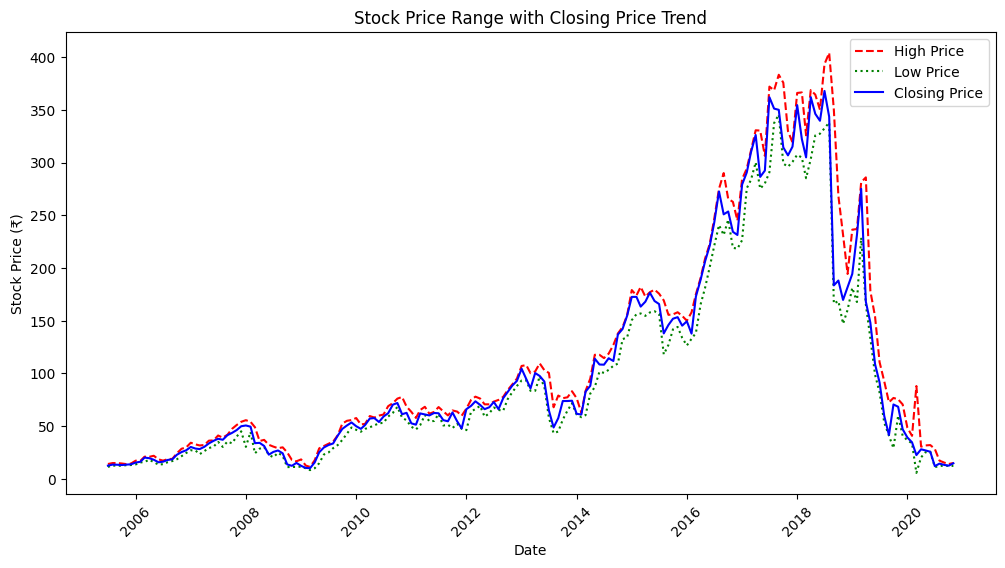

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['High'], label="High Price", color='red', linestyle='dashed')
plt.plot(df_cleaned['Date'], df_cleaned['Low'], label="Low Price", color='green', linestyle='dotted')
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (₹)")
plt.title("Stock Price Range with Closing Price Trend")
plt.legend()
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This visualization effectively compares high, low, and close prices.

##### 2. What is/are the insight(s) found from the chart?

The price range fluctuates significantly, confirming market volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, traders can use this for stop-loss and profit planning.

#### Chart - 10: Autocorrelation Plot

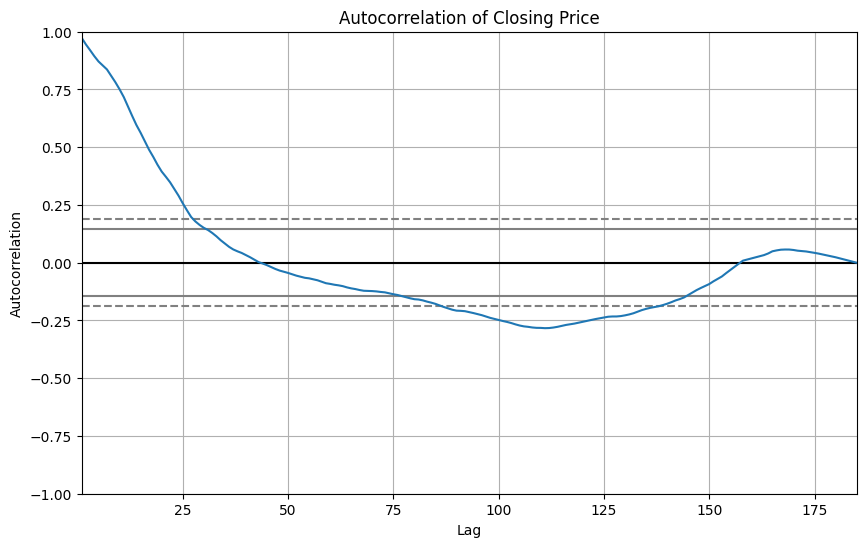

In [57]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df_cleaned['Close'])
plt.title("Autocorrelation of Closing Price")
plt.show()

##### 1. Why did you pick the specific chart?

An autocorrelation plot helps understand time-based dependencies.

##### 2. What is/are the insight(s) found from the chart?

Past stock prices significantly influence future price movements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps traders design strategies based on past trends.

No, autocorrelation helps forecastability, which is beneficial.

#### Chart - 11 - Correlation Heatmap

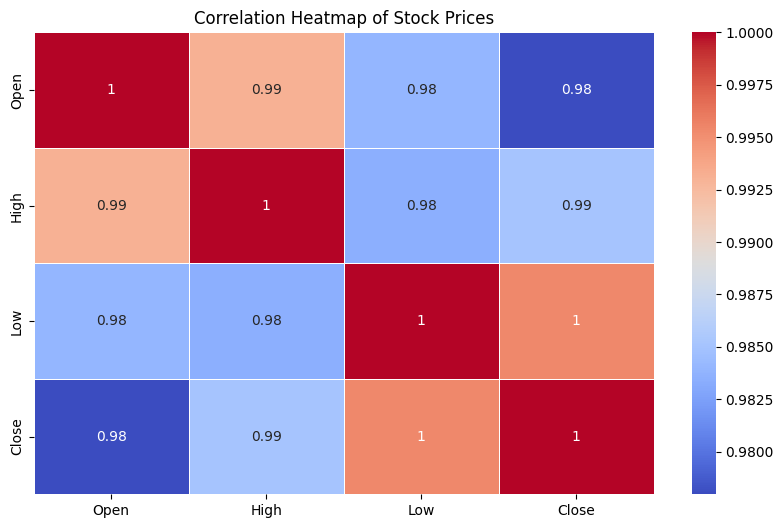

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap visually represents the relationships between numerical variables. This helps in understanding how different stock price metrics (Open, High, Low, Close) are related.

##### 2. What is/are the insight(s) found from the chart?

1. There is an extremely high correlation (close to 1) between all four variables.
2. Open, High, Low, and Close prices are almost perfectly correlated, indicating that these values move together in a predictable pattern.
3. High correlation suggests that if one of these values increases, the others likely increase as well.

#### Chart - 12 - Pair Plot

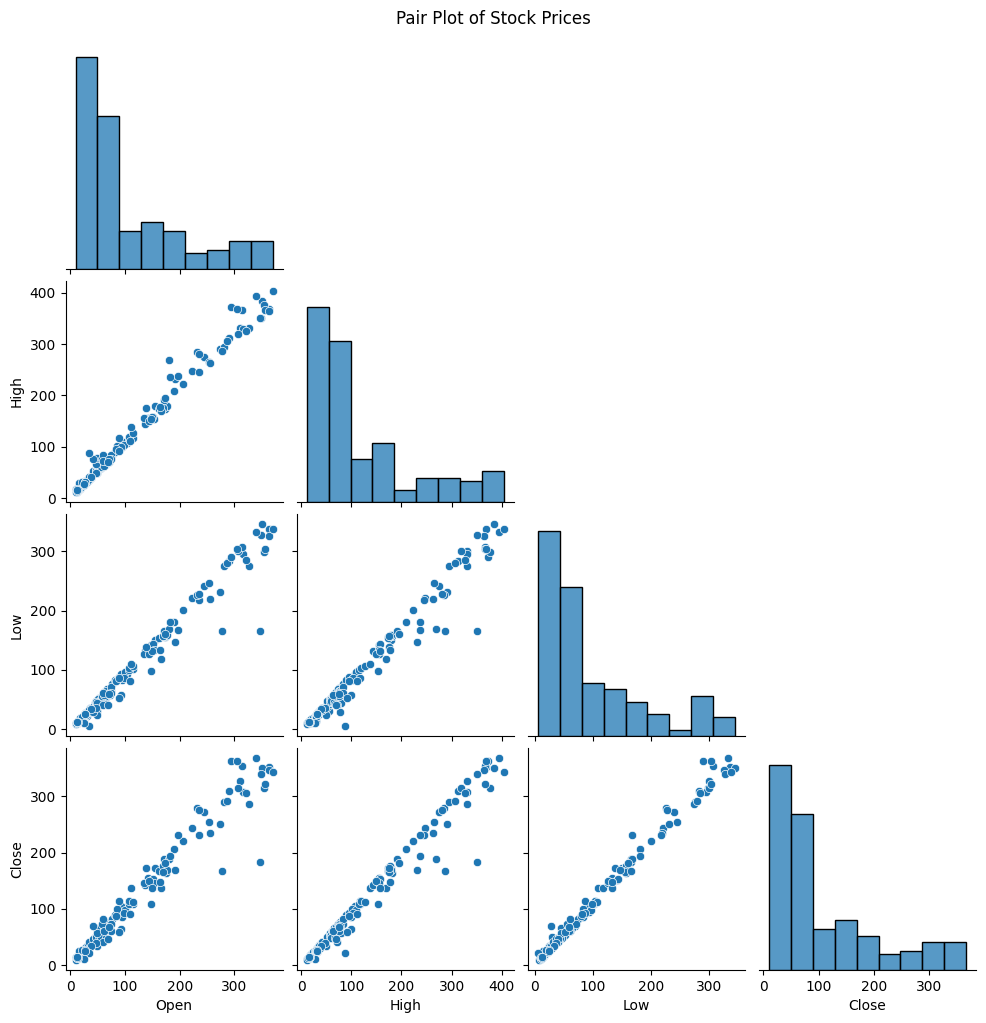

In [44]:
sns.pairplot(df_cleaned[['Open', 'High', 'Low', 'Close']], diag_kind='hist', corner=True)
plt.suptitle("Pair Plot of Stock Prices", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

 A pair plot shows relationships between multiple variables at once.

##### 2. What is/are the insight(s) found from the chart?

There is a strong correlation between Open, High, Low, and Close prices.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

###Below is how these insights align with the business objectives:

1. Stock Price Prediction Readiness

  * Finding: The closing price trend shows strong correlation with open, high, and low prices, confirming that historical price data holds predictive value.
  * Solution: Using technical indicators and trend analysis can enhance forecasting accuracy before applying advanced models.
2. Volatility Analysis

  * Finding: The rolling volatility plot highlights extreme price fluctuations, especially post-2018.
  * Solution: Investors should be cautious during high volatility phases and use risk management strategies, such as stop-loss mechanisms.
3. Impact of External Factors

  * Finding: The sharp declines in stock price in certain periods correlate with market crises and financial instability.
  * Solution: Monitoring external news, government policies, and banking sector trends can help anticipate downturns and reduce risk exposure.
3. Data-Driven Investment Strategies

  * Finding: The autocorrelation plot indicates that past stock prices influence future movements, confirming that time-based patterns exist.
  * Solution: Traders can adopt momentum trading strategies that rely on past price trends instead of random market moves.
4. Identifying Market Anomalies

  * Finding: The box plot and KDE distribution reveal extreme price outliers and skewed distributions, indicating unstable stock behavior.
  * Solution: Investors should avoid stocks exhibiting such unpredictable fluctuations unless they have a high-risk tolerance.

###Recommendations for the Client to Achieve Business Objectives
1. Enhance Decision-Making with Trend & Volatility Tracking

  * Continuously monitor moving averages and price fluctuations to make informed trading decisions.
  * Use technical indicators like Bollinger Bands, RSI, and MACD to refine investment timing.
2. Implement Risk Management Strategies

  * Set stop-loss orders during periods of high volatility to prevent major losses.
  * Allocate investments strategically to avoid overexposure in unstable stocks.
3. Leverage Seasonality & Historical Patterns

  * Use monthly trend analysis to identify the best and worst times to invest.
  * The monthly average bar chart suggests some seasonal behavior that could be leveraged for periodic investment planning.
4. Monitor External Influences

  * Track financial reports, regulatory news, and economic trends affecting the banking sector.
  * Be aware of corporate governance issues that might impact stock trustworthiness.
5. Avoid High-Risk Trading in Unstable Market Conditions

  * The violin plot and box plot show extreme price swings, making short-term speculation highly risky.
  * Long-term investors should focus on stability rather than high returns from volatile swings.

# **Conclusion**

The analysis of Yes Bank’s stock price trends, volatility, and correlations has provided valuable insights into its unpredictable behavior and market sensitivity. The strong correlation among price variables confirms that historical data can be leveraged for forecasting, while the rolling volatility chart highlights periods of extreme fluctuations, emphasizing the need for robust risk management. The autocorrelation analysis supports the use of time-series models for prediction, and the distribution plots reveal the stock’s instability, cautioning investors against speculative trading without proper safeguards. To navigate the complexities of Yes Bank’s stock, a strategic approach involving technical analysis, external market monitoring, and risk mitigation is essential. Implementing predictive models like ARIMA or LSTM, combined with technical indicators such as moving averages and RSI, can enhance decision-making. Ultimately, a balanced investment strategy—considering historical trends, external economic factors, and volatility—will allow traders and investors to make more informed and profitable decisions while minimizing exposure to unnecessary risks.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***